# Wine Reviews: Visualization and Data Story

The visualizations in the notebook are part of EDA for the wine ratings dataset.  This notebook is divided into several different sections and subsections, with three of the main sections considering the wine reviews from the countries most represented in the dataset. 

In [252]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')


In [253]:
winedata = pd.read_csv("cleaned_wine_data.csv")


## 1. Initial Visualizations
## 2. French Wines
## 3. Italian Wines
## 4. US Wines
## 5. Questions and Insights

In [254]:
winedata = winedata.drop('Unnamed: 0', 1)
winedata.head()

,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


## 1. Initial Visualizations

The variables that present the greatest interest in the wine review dataset are  **'points'**, **'country'**, and **'price'**.  Thus, it is useful to visualize how these variables are manifested in the dataset.  

### Points

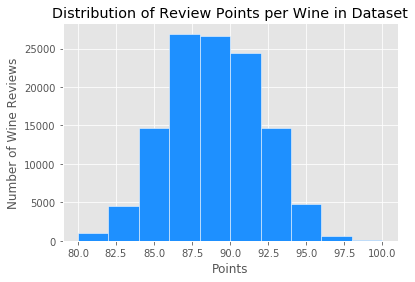

In [255]:
winedata['points'].hist(color='dodgerblue', ec='white')
plt.title('Distribution of Review Points per Wine in Dataset')
plt.ylabel('Number of Wine Reviews')
plt.xlabel('Points')

The vast majority of wine reviews in the dataset give about 86 to 92 points. 

### Country

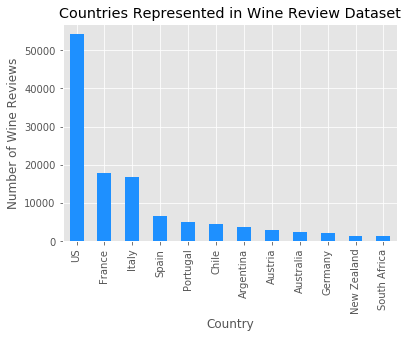

In [256]:
winedata['country'].value_counts().plot(kind='bar', color='dodgerblue')
plt.title('Countries Represented in Wine Review Dataset')
plt.ylabel('Number of Wine Reviews')
plt.xlabel('Country')

From the data, it appears that that wines from France, Italy, and, particularly the US, are overrepresented in the dataset. This indicates that separate analyses of the wine ratings of wines from these three countries may be warranted. 

### Price

What is the maximum and minimum price of wines in the dataset?

In [257]:
print (winedata['price'].max())
print (winedata['price'].min())

3300.0
4.0


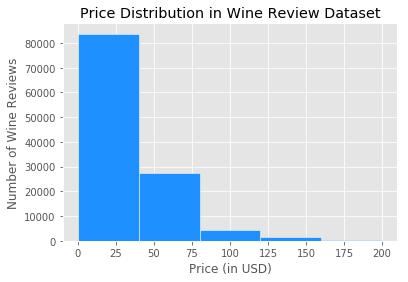

In [258]:
winedata['price'].hist(color='dodgerblue', ec='white', bins = 5, range= (0, 200))
plt.title('Price Distribution in Wine Review Dataset')
plt.ylabel('Number of Wine Reviews')
plt.xlabel('Price (in USD)')

The vast majority of wines review cost between 0 and 25 dollars.

### Country with Regards to Price and Points

Can a relationship between the price of a wine in the dataset and its country of origin be visualized?

In [ ]:
pts_per_country = pd.concat([pts_per_country.index, pts_per_country.values], axis=1)
pts_per_country.boxplot(by ='country', color = 'dodgerblue'

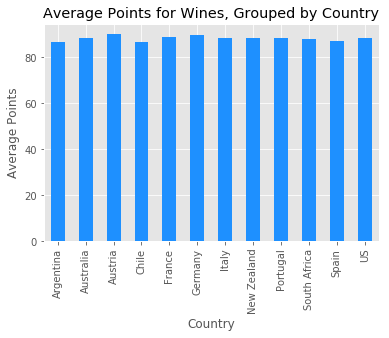

In [295]:
avg_pts_per_country = winedata.groupby('country')['points'].mean()
avg_pts_per_country.plot(kind ='bar', color = 'dodgerblue')
plt.title('Average Points for Wines, Grouped by Country')
plt.ylabel('Average Points')
plt.xlabel('Country')

There does not appear to be a strong relationship between country and average number of points.  What about country and price?

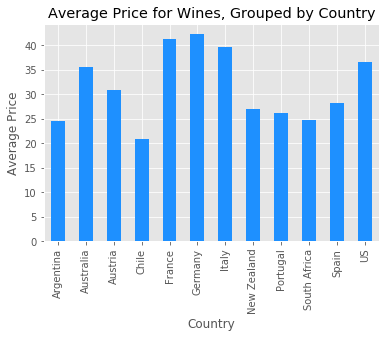

In [296]:
avg_pts_per_country = winedata.groupby('country')['price'].mean()
avg_pts_per_country.plot(kind ='bar', color = 'dodgerblue')
plt.title('Average Price for Wines, Grouped by Country')
plt.ylabel('Average Price')
plt.xlabel('Country')

There appears to be more variation in average price by country.  This may be due to outliers in price, as the following boxplot shows. 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

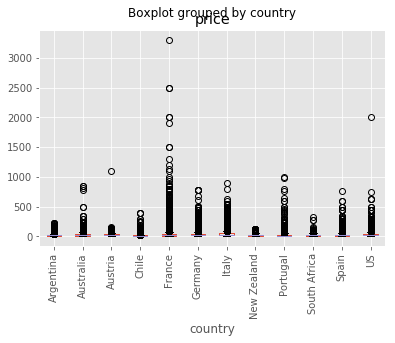

In [297]:
winedata.boxplot(by='country', column=['price'])
plt.xticks(rotation=90)

Perhaps it would be beneficial to separate the wines by price category: inexpensive, mid-priced, and expensive. The following function creates a new column that assigns a given wine a categorical value based on its price. 

#### Expensive wines

Define a new dataframe for just expensive wines. 

In [80]:
def expense_category(val):
    if val <= 20:
        return "inexpensive"
    elif val >30 and val <=200:
        return "mid-priced"
    else:
        return "expensive"

winedata['price_category'] = winedata['price'].apply(expense_category)

winedata.head()

,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery,price_category
0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,inexpensive
1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,inexpensive
2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,inexpensive
3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,mid-priced
4,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,inexpensive


In [81]:
winedata_expensive = winedata[winedata['price_category'] == 'expensive'].reset_index()
winedata_expensive.head()

,index,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery,price_category
0,6,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,expensive
1,8,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,expensive
2,10,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,expensive
3,13,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking,expensive
4,14,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,Michael Schachner,@wineschach,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque,expensive


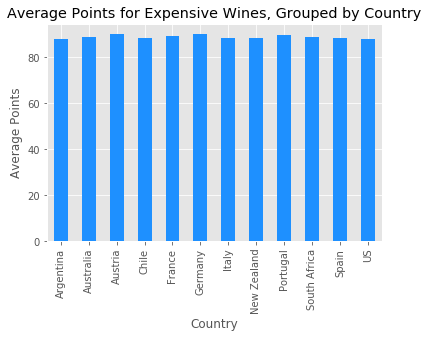

In [82]:
avg_pts_per_country_exp = winedata_expensive.groupby('country')['points'].mean()
avg_pts_per_country_exp.plot(kind ='bar', color = 'dodgerblue')
plt.title('Average Points for Expensive Wines, Grouped by Country')
plt.ylabel('Average Points')
plt.xlabel('Country')

The above visualization doesn't indicate how many wines are in each country category.  This may be significant. 

In [83]:
winedata_expensive['country'].value_counts()

US              13742
France           4193
Italy            3699
Spain            1233
Austria           811
Portugal          771
Chile             585
Germany           561
Argentina         553
Australia         454
New Zealand       361
South Africa      226
Name: country, dtype: int64

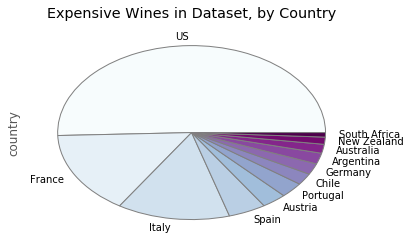

In [84]:
valcounts = winedata_expensive['country'].value_counts()
valcounts.plot(kind='pie', wedgeprops={"edgecolor":"grey",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True}, cmap=plt.cm.BuPu,)
plt.title('Expensive Wines in Dataset, by Country')


American wines are significantly overrepresented in the data.

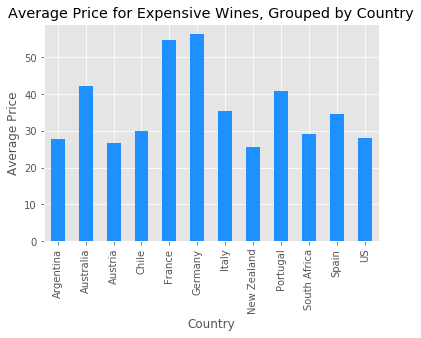

In [85]:
avg_price_per_country_exp = winedata_expensive.groupby('country')['price'].mean()
avg_price_per_country_exp.plot(kind ='bar', color = 'dodgerblue')
plt.title('Average Price for Expensive Wines, Grouped by Country')
plt.ylabel('Average Price')
plt.xlabel('Country')

This indicates, that on average, expensive wines from France and Germany were significantly more expensive than expensive wines from other countries.  This difference between average price for expensive wines was not, however, significantly reflected in the average number of points that reviwers gave to them.  This disparity in the above chart may also be due to certain outliers within the groups of wines that are from France and Germany. 

#### Inexpensive wines

In [86]:
winedata_inexpensive = winedata[winedata['price_category'] == 'inexpensive'].reset_index()

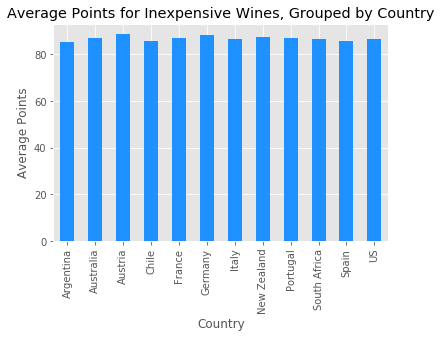

In [87]:
avg_pts_per_country_inexp = winedata_inexpensive.groupby('country')['points'].mean()
avg_pts_per_country_inexp.plot(kind ='bar', color = 'dodgerblue')
plt.title('Average Points for Inexpensive Wines, Grouped by Country')
plt.ylabel('Average Points')
plt.xlabel('Country')

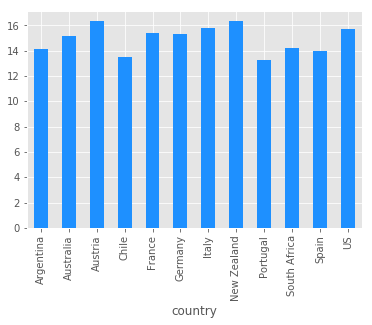

In [75]:
avg_price_per_country_inexp = winedata_inexpensive.groupby('country')['price'].mean()
avg_price_per_country_inexp.plot(kind ='bar', color = 'dodgerblue')

It is notable that the Chilean, Potuguese and Spanish inexpensive wines are, on average, several dollars cheaper than the expensive wines from other countries.  However, a strong disparity in their ratings in relation to the wines from other countries wasn't strongly reflected. 

#### Mid-priced wines

In [90]:
winedata_mid = winedata[winedata['price_category'] == 'mid-priced'].reset_index()

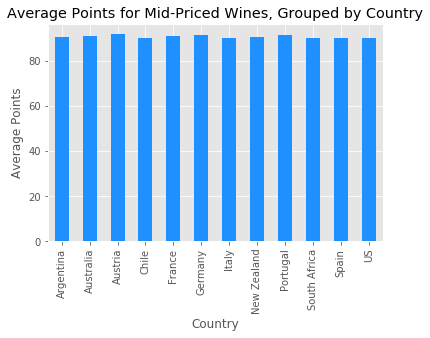

In [92]:
avg_points_per_country_mid = winedata_mid.groupby('country')['points'].mean()
avg_points_per_country_mid.plot(kind ='bar', color = 'dodgerblue')
plt.title('Average Points for Mid-Priced Wines, Grouped by Country')
plt.ylabel('Average Points')
plt.xlabel('Country')

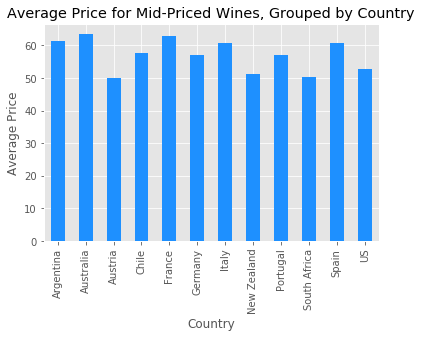

In [91]:
avg_price_per_country_mid = winedata_mid.groupby('country')['price'].mean()
avg_price_per_country_mid.plot(kind ='bar', color = 'dodgerblue')
plt.title('Average Price for Mid-Priced Wines, Grouped by Country')
plt.ylabel('Average Price')
plt.xlabel('Country')

Mid-priced wines received, on average, similar ratings, however, mid-priced wines from Austria and South Africa tended to be less expensive from mid-priced wines from other countries. 

## 2. French Wines

In [193]:
frenchwines = winedata[winedata['country'] == 'France'].reset_index()
frenchwines.head()


,index,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery,price_category
0,6,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach,expensive
1,8,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,expensive
2,10,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer,expensive
3,37,France,"This is a festive wine, with soft, ripe fruit ...",Nouveau,86,9.0,Beaujolais,Beaujolais,Roger Voss,@vossroger,Henry Fessy 2012 Nouveau (Beaujolais),Gamay,Henry Fessy,inexpensive
4,44,France,"Soft and fruity, this is a generous, ripe wine...",Eté Indien,86,14.0,Beaujolais,Brouilly,Roger Voss,@vossroger,Vignerons de Bel Air 2011 Eté Indien (Brouilly),Gamay,Vignerons de Bel Air,inexpensive


Does "region" appear to influence wine reviews for French wines?

In [194]:
frenchwines['region'].value_counts()

Bordeaux                4002
Burgundy                3106
Alsace                  2147
Loire Valley            1598
Champagne               1383
Southwest France        1335
Provence                1139
Rhône Valley            1042
Beaujolais               846
Languedoc-Roussillon     589
France Other             589
Name: region, dtype: int64

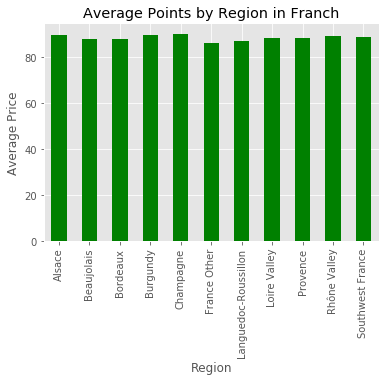

In [195]:
avg_points_per_region = frenchwines.groupby('region')['points'].mean()
avg_points_per_region.plot(kind ='bar', color = 'green')
plt.title('Average Points by Region in France')
plt.ylabel('Average Price')
plt.xlabel('Region')

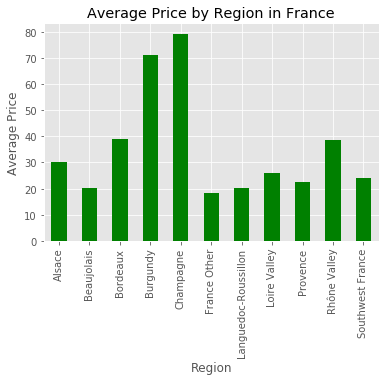

In [196]:
avg_price_per_region = frenchwines.groupby('region')['price'].mean()
avg_price_per_region.plot(kind ='bar', color = 'green')
plt.title('Average Price by Region in France')
plt.ylabel('Average Price')
plt.xlabel('Region')

Interestingly, the average number of points reviewers gave to wines were similar for all regions in France; however, on average, wines from the **Burgundy** and **Champagne** regions were much more expensive than wines from other regions. 

However, is this phenomenon due to outliers? 

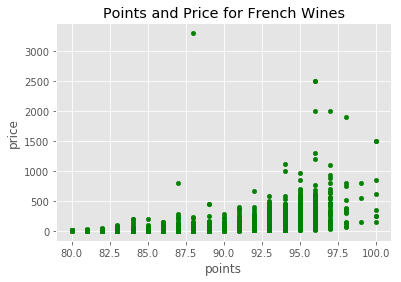

In [197]:
frenchwines.plot(kind='scatter', x='points', y='price', color='green')
plt.title('Points and Price for French Wines')


In [238]:
newfrenchwines = frenchwines[frenchwines['price'] < 500].reset_index()

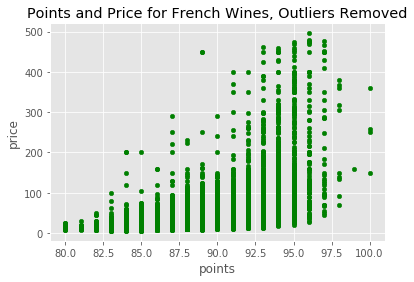

In [286]:
newfrenchwines.plot(kind='scatter', x='points', y='price', color='green')
plt.title('Points and Price for French Wines, Outliers Removed')

Are there still significant outliers?

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text xticklabel objects>)

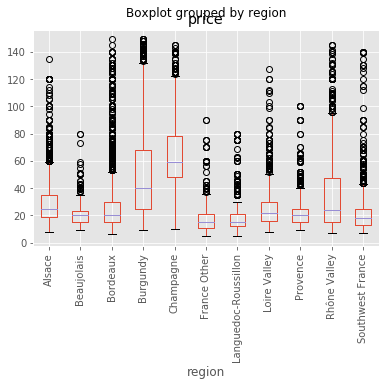

In [292]:
newfrenchwines.boxplot(by='region', column=['price'])
plt.xticks(rotation=90)

In [290]:
newfrenchwines = frenchwines[frenchwines['price'] < 150].reset_index()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Text xticklabel objects>)

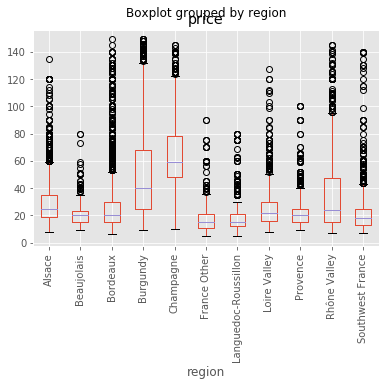

In [298]:
newfrenchwines.boxplot(by='region', column=['price'])
plt.xticks(rotation=90)

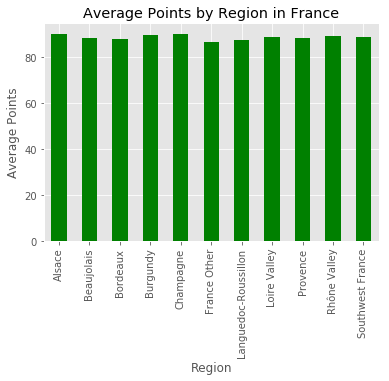

In [299]:
avg_points_per_region_new = newfrenchwines.groupby('region')['points'].mean()
avg_points_per_region_new.plot(kind ='bar', color = 'green')
plt.title('Average Points by Region in France')
plt.ylabel('Average Points')
plt.xlabel('Region')

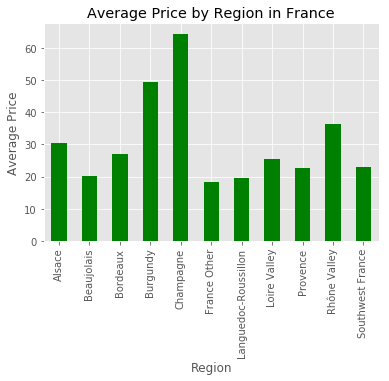

In [300]:
avg_price_per_region_new = newfrenchwines.groupby('region')['price'].mean()
avg_price_per_region_new.plot(kind ='bar', color = 'green')
plt.title('Average Price by Region in France')
plt.ylabel('Average Price')
plt.xlabel('Region')

Even after removing outliers, the Burgundy and Champagne regions were still much more expensive than wines from other regions, with the disparity not being reflected in points. 

## 3. Italian Wines

In [108]:
italianwines = winedata[winedata['country'] == 'Italy'].reset_index()
italianwines.head()

,index,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery,price_category
0,5,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,inexpensive
1,20,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,inexpensive
2,22,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì,mid-priced
3,24,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari,inexpensive
4,25,Italy,"Aromas recall ripe dark berry, toast and a whi...",NaN,87,10.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Nero d'Avola (Terre Siciliane),Nero d'Avola,Stemmari,inexpensive


In [109]:
italianwines['region'].value_counts()

Tuscany               5128
Piedmont              3089
Veneto                2315
Northeastern Italy    1986
Sicily & Sardinia     1559
Southern Italy        1131
Central Italy         1100
Lombardy               481
Italy Other            112
Northwestern Italy      13
Name: region, dtype: int64

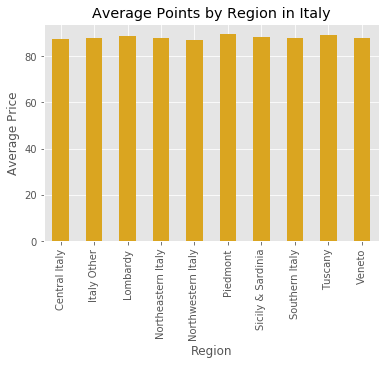

In [110]:
avg_points_per_region = italianwines.groupby('region')['points'].mean()
avg_points_per_region.plot(kind ='bar', color = 'goldenrod')
plt.title('Average Points by Region in Italy')
plt.ylabel('Average Price')
plt.xlabel('Region')

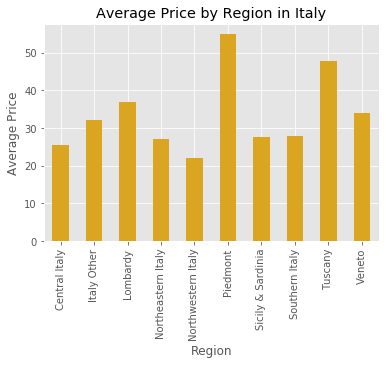

In [111]:
avg_price_per_region = italianwines.groupby('region')['price'].mean()
avg_price_per_region.plot(kind ='bar', color = 'goldenrod')
plt.title('Average Price by Region in Italy')
plt.ylabel('Average Price')
plt.xlabel('Region')

Similar to what was observed with the French wines, Italian wines received similar ratings, but wines from the **Piedmont** and **Tuscany** regions tended to be significantly more expensive than wines from other regions. 

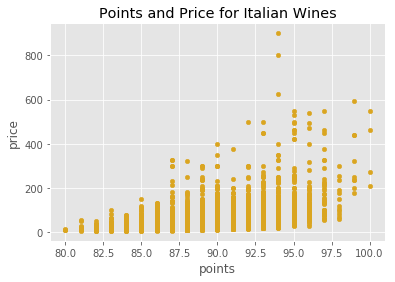

In [208]:
italianwines.plot(kind='scatter', x='points', y='price', color='goldenrod')
plt.title('Points and Price for Italian Wines')

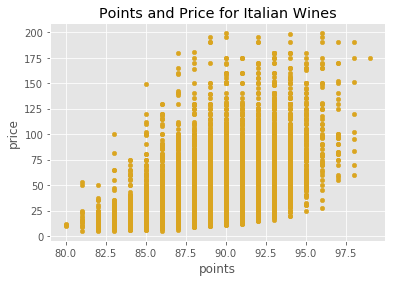

In [236]:
newitalianwines = italianwines[italianwines['price'] < 200]
newitalianwines.plot(kind='scatter', x='points', y='price', color='goldenrod')
plt.title('Points and Price for Italian Wines')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

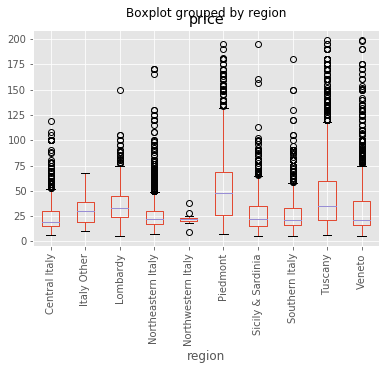

In [317]:
newitalianwines.boxplot(by='region', column=['price'])
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Text xticklabel objects>)

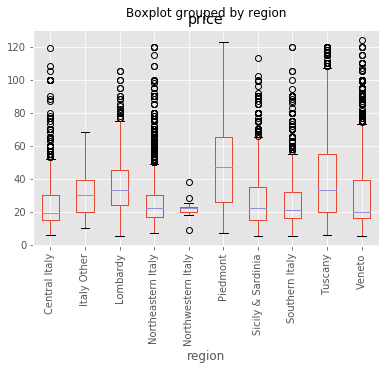

In [320]:
newitalianwines = italianwines[italianwines['price'] < 125]
newitalianwines.boxplot(by='region', column=['price'])
plt.xticks(rotation=90)

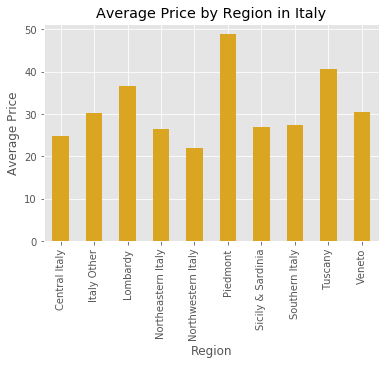

In [321]:
avg_price_per_region = newitalianwines.groupby('region')['price'].mean()
avg_price_per_region.plot(kind ='bar', color = 'goldenrod')
plt.title('Average Price by Region in Italy')
plt.ylabel('Average Price')
plt.xlabel('Region')

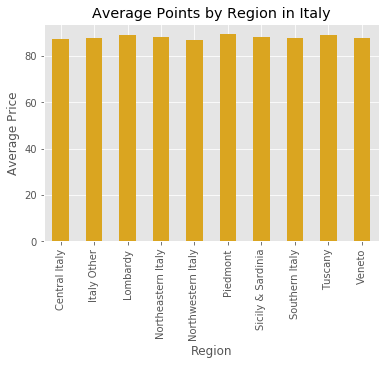

In [322]:
avg_points_per_region = newitalianwines.groupby('region')['points'].mean()
avg_points_per_region.plot(kind ='bar', color = 'goldenrod')
plt.title('Average Points by Region in Italy')
plt.ylabel('Average Price')
plt.xlabel('Region')

Even after removing many outliers, wines from Piedmont and Tuscany are significantly more expensive than wines from other regions.  This discrepancy is not reflected in the ratings. 

## 4. US Wines

In [301]:
uswines = winedata[winedata['country'] == 'US'].reset_index()
uswines.head()

,index,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery
0,1,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,2,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,3,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,9,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
4,11,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [302]:
uswines['region'].value_counts()

California           36104
Washington            8583
Oregon                5359
New York              2676
Virginia               770
Idaho                  190
Michigan               111
America                 95
Texas                   93
Colorado                68
New Mexico              45
Arizona                 40
Missouri                33
North Carolina          23
Pennsylvania            18
Ohio                    12
New Jersey               8
Washington-Oregon        7
Massachusetts            7
Illinois                 6
Iowa                     4
Nevada                   4
Vermont                  3
Connecticut              3
Kentucky                 1
Rhode Island             1
Hawaii                   1
Name: region, dtype: int64

It is notable from these value counts that California wines are vastly overrepresented in the dataset.  Because of this, it will be perhaps be useful to analyze California wines specifically, after considering US wines.  Some states represented have less than 10 wines, which makes the data less useful; additionally, the designation "America" is a mislabling that is not helpful.  Because of this, it will be best to filter this dataframe so that the most represented states remains. 

In [303]:
newstates = uswines['region'].value_counts() > 100
newstates = newstates[newstates]
stateslist = list(newstates.index)

In [304]:
uswines = uswines[uswines['region'].isin(stateslist)].reset_index()

In [305]:
uswines['region'].value_counts()

California    36104
Washington     8583
Oregon         5359
New York       2676
Virginia        770
Idaho           190
Michigan        111
Name: region, dtype: int64

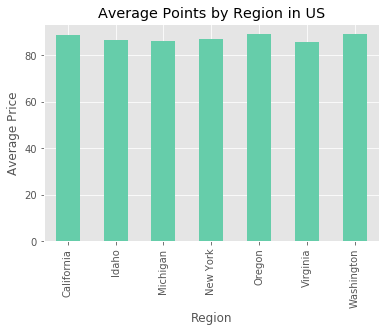

In [306]:
avg_points_per_region = uswines.groupby('region')['points'].mean()
avg_points_per_region.plot(kind ='bar', color = 'mediumaquamarine')
plt.title('Average Points by Region in US')
plt.ylabel('Average Price')
plt.xlabel('Region')

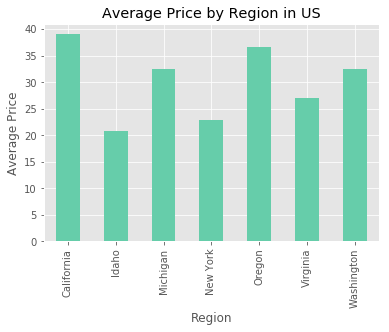

In [307]:
avg_price_per_region = uswines.groupby('region')['price'].mean()
avg_price_per_region.plot(kind ='bar', color = 'mediumaquamarine')
plt.title('Average Price by Region in US')
plt.ylabel('Average Price')
plt.xlabel('Region')

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

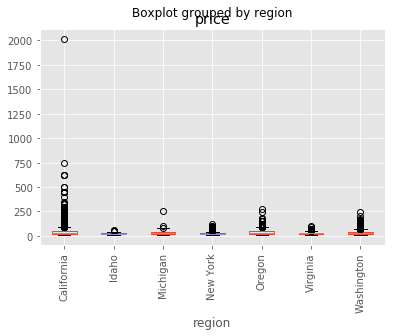

In [324]:
uswines.boxplot(by='region', column=['price'])
plt.xticks(rotation=90)

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

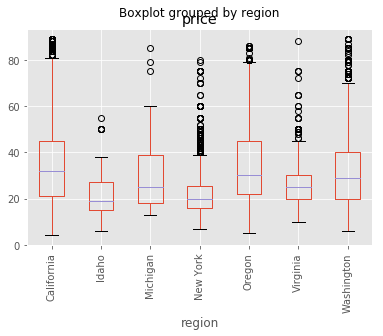

In [327]:
newuswines = uswines[uswines['price'] < 90]
newuswines.boxplot(by='region', column=['price'])
plt.xticks(rotation=90)

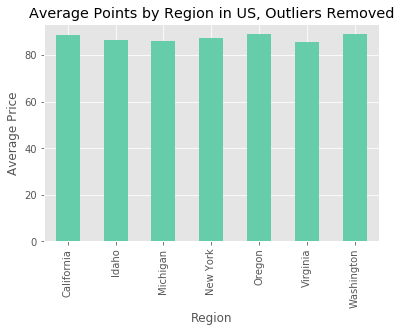

In [328]:
avg_points_per_region = newuswines.groupby('region')['points'].mean()
avg_points_per_region.plot(kind ='bar', color = 'mediumaquamarine')
plt.title('Average Points by Region in US, Outliers Removed')
plt.ylabel('Average Price')
plt.xlabel('Region')

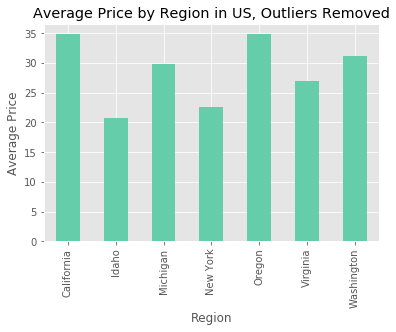

In [329]:
avg_price_per_region = newuswines.groupby('region')['price'].mean()
avg_price_per_region.plot(kind ='bar', color = 'mediumaquamarine')
plt.title('Average Price by Region in US, Outliers Removed')
plt.ylabel('Average Price')
plt.xlabel('Region')

After removing many outliers, California and Oregon wines still appear to be more expensive than wines from other states.  Ratings by region tend to be quite similar. 

#### California Wines

Because there are so many wines specifically from California in the dataset, it may be helpful to conduct an analysis of wines from California.

In [330]:
caliwines = uswines[uswines['region'] == 'California']
caliwines.head()


,level_0,index,country,description,designation,points,price,region,sub_region,taster_name,taster_twitter_handle,title,variety,winery
3,3,9,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
4,4,11,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
5,5,12,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
9,9,21,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
10,10,23,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa


In [331]:
caliwines['sub_region'].value_counts()

Napa Valley                                  4475
Russian River Valley                         3090
California                                   2627
Paso Robles                                  2327
Sonoma Coast                                 1467
Sonoma County                                1245
Carneros                                      999
Santa Barbara County                          994
Sta. Rita Hills                               971
Dry Creek Valley                              936
Santa Ynez Valley                             806
Santa Lucia Highlands                         802
Lodi                                          799
Alexander Valley                              780
Central Coast                                 737
Santa Maria Valley                            701
Sonoma Valley                                 660
Anderson Valley                               646
Santa Cruz Mountains                          547
Livermore Valley                              448


There are many sub-regions for California wines in the dataset, but many of them only appear a few times.  Thus, it makes the most sense to consider only the sub-regions that appear a significant number of times for analysis. 

In [332]:
calsubregions = caliwines['sub_region'].value_counts() > 500
calsubregions = calsubregions[calsubregions]
calsubregionslist = list(calsubregions.index)
modified_caliwines = caliwines[caliwines['sub_region'].isin(calsubregionslist)]

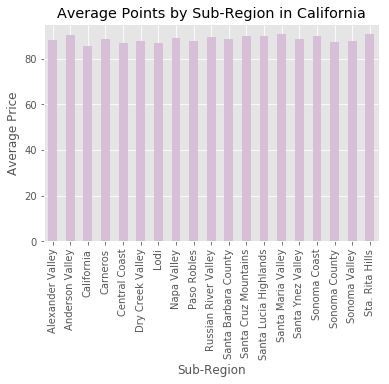

In [333]:
avg_points_per_sub_region = modified_caliwines.groupby('sub_region')['points'].mean()
avg_points_per_sub_region.plot(kind ='bar', color = 'thistle')
plt.title('Average Points by Sub-Region in California')
plt.ylabel('Average Price')
plt.xlabel('Sub-Region')

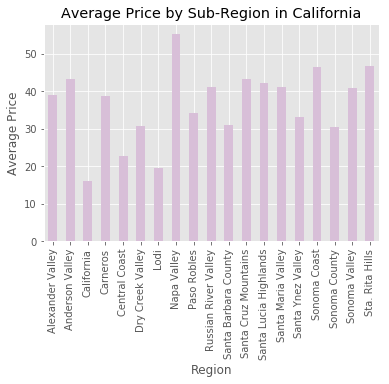

In [334]:
avg_price_per_sub_region = modified_caliwines.groupby('sub_region')['price'].mean()
avg_price_per_sub_region.plot(kind ='bar', color = 'thistle')
plt.title('Average Price by Sub-Region in California')
plt.ylabel('Average Price')
plt.xlabel('Region')

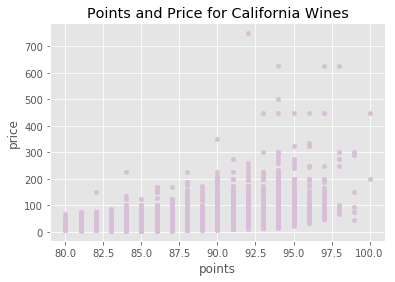

In [336]:
modified_caliwines.plot(kind='scatter', x='points', y='price', color='thistle')
plt.title('Points and Price for California Wines')

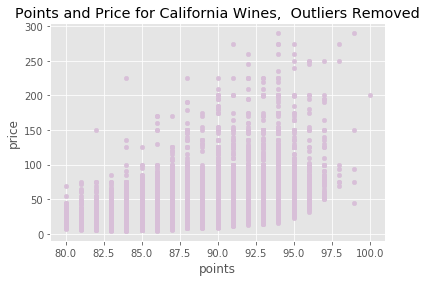

In [337]:
modified_caliwines = modified_caliwines[modified_caliwines['price'] < 300]
modified_caliwines.plot(kind='scatter', x='points', y='price', color='thistle')
plt.title('Points and Price for California Wines,  Outliers Removed')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text xticklabel objects>)

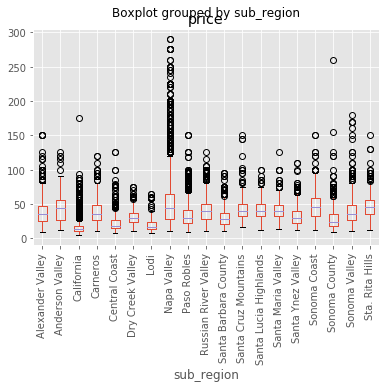

In [339]:
modified_caliwines.boxplot(by='sub_region', column=['price'])
plt.xticks(rotation=90)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text xticklabel objects>)

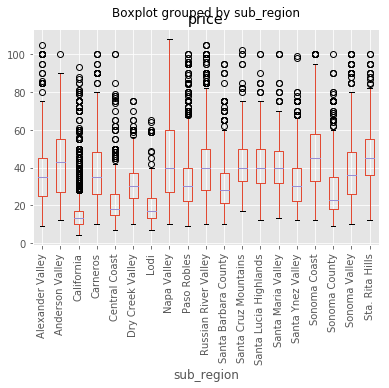

In [343]:
modified_caliwines = modified_caliwines[modified_caliwines['price'] < 110]
modified_caliwines.boxplot(by='sub_region', column=['price'])
plt.xticks(rotation=90)


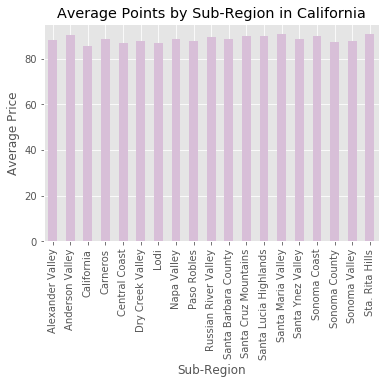

In [344]:
avg_points_per_sub_region = modified_caliwines.groupby('sub_region')['points'].mean()
avg_points_per_sub_region.plot(kind ='bar', color = 'thistle')
plt.title('Average Points by Sub-Region in California')
plt.ylabel('Average Price')
plt.xlabel('Sub-Region')

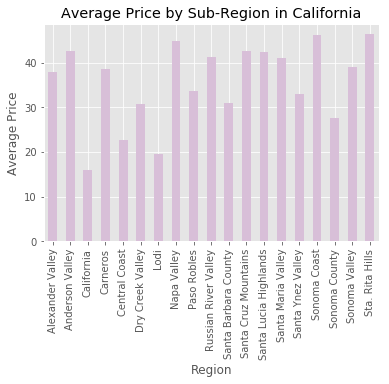

In [345]:
avg_price_per_sub_region = modified_caliwines.groupby('sub_region')['price'].mean()
avg_price_per_sub_region.plot(kind ='bar', color = 'thistle')
plt.title('Average Price by Sub-Region in California')
plt.ylabel('Average Price')
plt.xlabel('Region')

Even after removing outliers, **Napa Valley**, **Sonoma Coast**, and **Sta. Rita Hills** wines stand out as significantly higher priced than wines from other regions. 

## 5. Questions and Insights

#### Insights

1.  From considering inexpensive wines in the Initial Visualizations section, it became apparent that Chilean and Portuguese wines are, on average, several dollars less expensive than wines from other countries.  This disparity, however, was not reflected in the the average amount of points given to Chilean and Portuguese wines by reviewers. 

2. Within the French wines, wines from Champagne and Burgundy received significantly higher reviews than wines for other regions, yet the reviews were, on average, quite similar.  A similar relationship was observed with Italian wines from Tuscany and Piedmont and California wines from Napa Valley, Sonoma Coast, and Sta. Rita Hills.

#### Questions for Further Exploration

1. Is it possible to predict the likelihood of a French, Italian, or US wine's region of origin based on price?

2. What are the particularities of some of the outliers?  How do very expensive wines from certain regions compare to inexpensive wines with regards to ratings?